My vision for my final project for Econ-411 is an interactive stock analysis dashboard that could be institutionalized and used for Bison Fund analysis. My thoughts of useful content is split up into 4 categories
1.	Fundamental Analysis

Fundamental Analysis is the basis of Bison Fund’s security Analysis. Having the opportunity to pull data from SEC 10k and 10q filings would both speed up our process as well as give better fundamental data. This data would then be filtered through to allow us to get key performance indicators including company margins over time, ROA, ROIC, and ROE metrics, which we feel is indicative of how well a company uses shareholder capital, and other important information about the company. Employee count, square footage being used, and segmented data would all be helpful, but I expect it to be difficult to create a methodology to scrub that across more than an individual company, and it may need to be on a case by case basis. Especially with changes in reporting and methodology this might not be feasible. If possible, I would also like to be able to pull company descriptions, supply chain data, and other useful statistics that have to do with fundamental and operational data for each company. Unfortunately I am unsure if this exists, so this is on the backburner for now.
This fundamental data will probably come from a dataset provided by SEC, which gives a full dataset of all quarterly filings that are sent in to them. This dataset is quite large and will need to be converted into a parquet to be usable in python, as well as make it user friendly for specific security lookup. I will try to build a simple valuation model into this analysis using EPS data and assigning a multiple based on expected EPS growth or ROIC, whichever I decide is more indicative of a premium that should be paid for a company.

2.	Portfolio Backdrop

It is important to have a perception of how well that the Bison Fund is actually selecting securities. Not only are we intending to be introspective into how well we actually picked individual stocks, but also how well we projected their growth going forward. That is why we would like to have a comparison of the performance of our portfolio vs. our investible world. For the comparison, I would like to use the Russel 2000 as an index since we focus on the small – mid cap space, and my intention is to run a simple simulation of different portfolios to see their performance as risk adjusted. As of now I’m not sure how I would like to quantify risk in each portfolio since I don’t see volatility as risk if the company is held at an average of 7 years. At that point it’s only valuation risk that we’re afraid of.
I expect this testing to use a dataset from Bloomberg or yfinance to pull prices, log the data of the individual companies in the Russel 2000, and then compare randomly weighted portfolio performance of around 25 companies with the Russel 2000 index as a baseline, and also the S&P as a baseline. Maybe this will generate more questions or insights into what type of companies we should be looking to pitch back to the fund.

3.	Macroeconomic awareness 

One of the enemies that we all face is Mr. Market. Valuation risk is a real risk, and oftentimes the market sentiment overestimates the optimism and the pessimism of each individual security. You need only look at Cisco at the turn of the century. A security that could never produce enough value to be worth $80 per share was squeezed way higher because of market sentiment. It hasn’t recovered since because of fundamental reasons. We want to be able to determine the healthiness of the market as a % of stocks in the index that have gone up vs down. I am hoping to set an arbitrary amount like 20% in either direction, and then hold a third option as relatively no change. As of now I want to annualize the data and put it over a 3 year time frame, but this is subject to change as I see fit to adjust. This will give us insight into how investible our world of stocks is, since if 90% of our investible world is down 20% or more YOY, the other 10% are neutral, and the company fundamentals have not changed, this gives a strong signal to purchase overselling of phenomenal companies.
I expect this will use a similar dataset to bullet #2, by just pulling pricing data of all the stocks in the Russel 2000 and then having a rolling number that states the count or % as Optimism or Pessimism.

4.	Live pricing data for current portfolio

I already have the bone structure of this process for obvious reasons. We want to be able to check pricing data of our current holdings and compare them to intrinsic values of our companies. This will give us a buy or sell signal on individual securities. 
This will use the yfinance database through python, and can return dataframes for individual securities and grouped securities.

Below are exercises of me pulling historical pricing data from different stocks that Bison Fund has considered investing in, data to pull pricing data about individual stocks. Previously I had a working function to pull multiple at once, but since reverting to an older version of yfinance this has ceased to be useful. I have charted log data of stock prices, a dataset of expected earnings, which we will use to estimate intrinsic value if we don't have one, and assign multiples to potential investments. I also have imported CPI data from fred, which I might use for macroeconomic backdrop. As of yet I haven't decided. There also is a potential to use bloomberg API if I can learn it quick enough for the final project deadline.

This is all to be used for Bison Fund and the production of value for our managed funds, the aid of students in understanding the process of stock analysis better, and for the sake of improving the due diligence process of the Fund. 

Hopefully through this dashboard we can make more timely decisions on purchasing and selling securities, have a better introspective view on how well the fund is doing at security selection, and make better buying decisions based on overexaggerated sentiment of the market in the short term to create value over the long term

https://stackoverflow.com/questions/19387868/how-do-i-store-data-from-the-bloomberg-api-into-a-pandas-dataframe

In [3]:
# !pip install pandas-datareader
# !pip install pyarrow
import yfinance as yf
import pandas as pd
import datetime
import pandas_datareader as web
import matplotlib.pyplot as plt
yf.__version__

'0.1.72'

In [6]:
yf.pdr_override()
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime.today()

data_dict = {}
stocks = ["ENPH", "SMG", "MBUU", "TREX"]
for key in stocks:
    data_dict[key] = web.data.get_data_yahoo(key, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
close_data = pd.concat([val["Close"]for val in data_dict.values()],
                      keys = data_dict.keys(),
                      axis = 1)
close_data.head()

,ENPH,SMG,MBUU,TREX
Date,,,,
2012-01-03,NaN,47.290001,NaN,2.88250
2012-01-04,NaN,47.570000,NaN,2.90375
2012-01-05,NaN,47.450001,NaN,2.92375
2012-01-06,NaN,47.619999,NaN,2.88750
2012-01-09,NaN,47.759998,NaN,2.87875


C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_4160\916516914.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


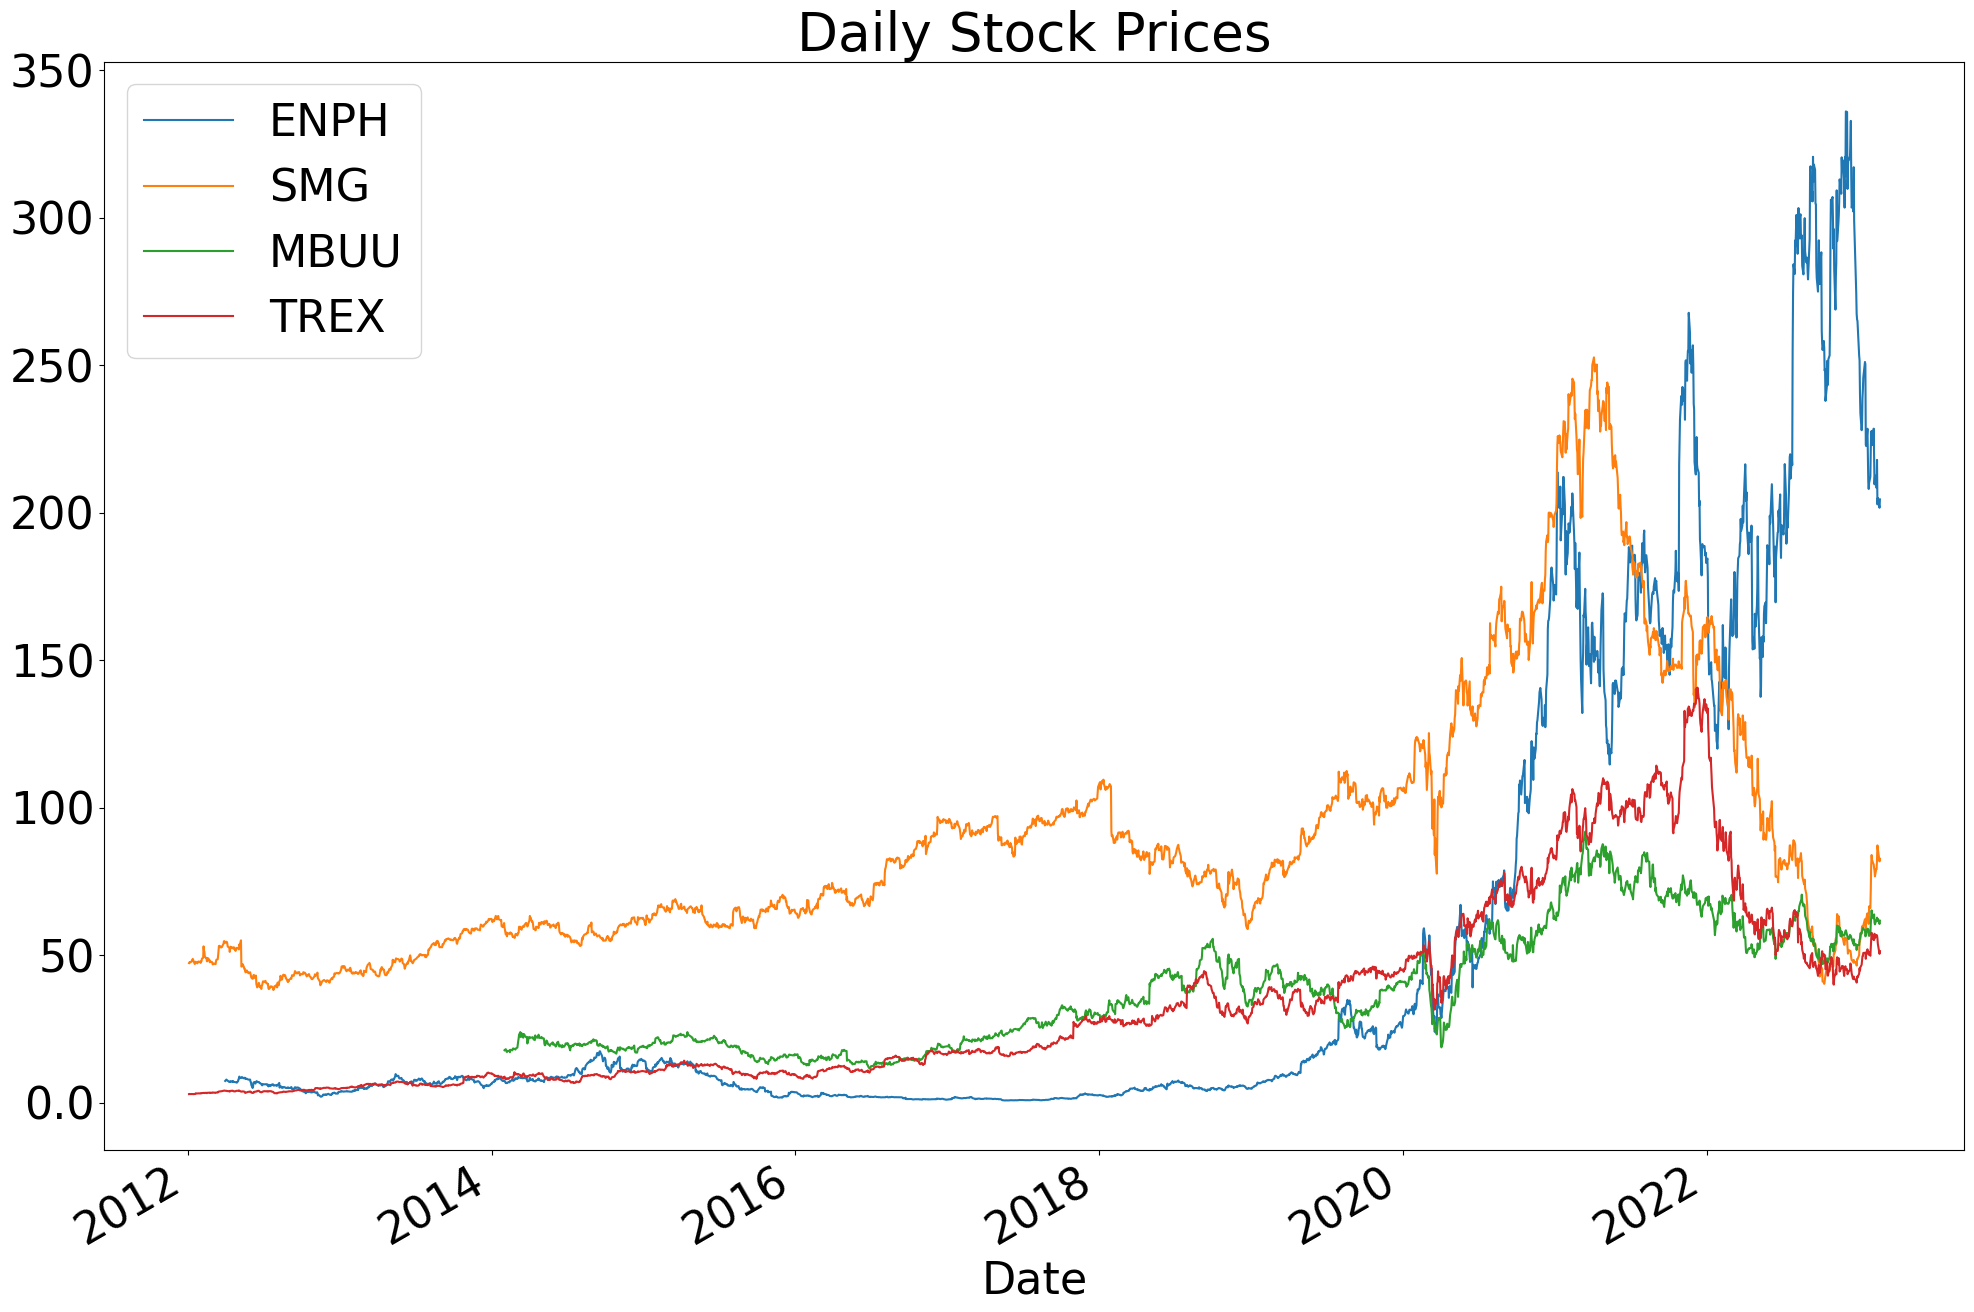

In [11]:
# this produces a traditional stock close chart
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Daily Stock Prices")
plt.show()
plt.close()

C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_4160\1880100640.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


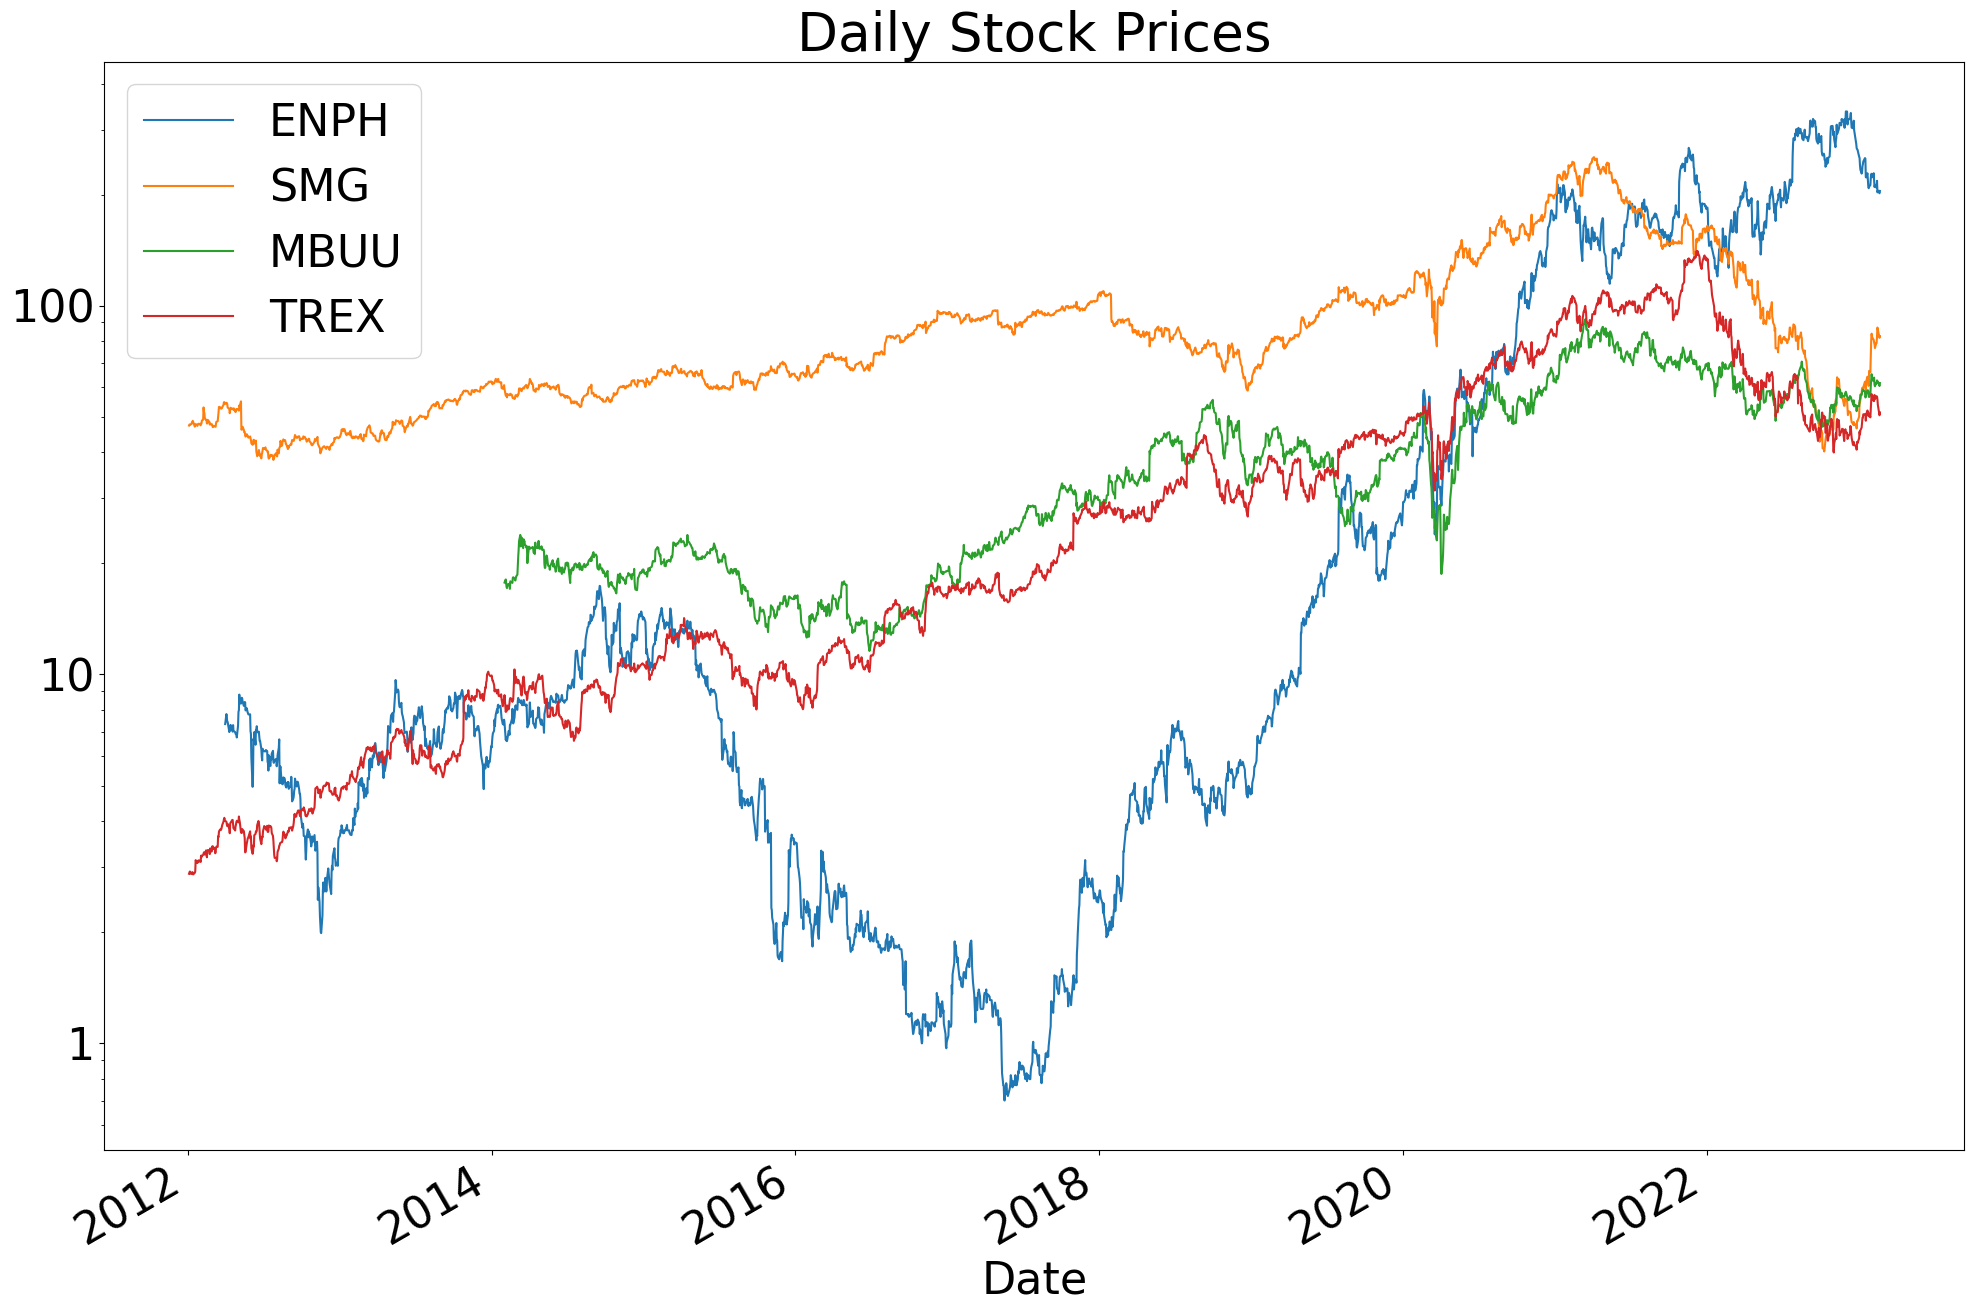

In [13]:
# this produces a log of stock prices chart
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
close_data.plot.line(ax = ax, legend = True)
ax.set_yscale("log")
y_vals = ax.get_yticks()
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Daily Stock Prices")
plt.show()
plt.close()

In [20]:
# this is to build a way to pull stock data for one stock at a time
# still working on making this to pull multiple stocks at once
# used for pricing data primarily

def stock_data(stock):
        data_dict = {}
        stock = [stock]
        for key in stock:
            data_dict[key] = web.data.get_data_yahoo(key, start, end)
        return data_dict
    
stock_data("MSFT")


[*********************100%***********************]  1 of 1 completed


{'MSFT':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2012-01-03   26.549999   26.959999   26.389999   26.770000   21.413065   
 2012-01-04   26.820000   27.469999   26.780001   27.400000   21.917004   
 2012-01-05   27.379999   27.730000   27.290001   27.680000   22.140970   
 2012-01-06   27.530001   28.190001   27.530001   28.110001   22.484919   
 2012-01-09   28.049999   28.100000   27.719999   27.740000   22.188959   
 ...                ...         ...         ...         ...         ...   
 2023-02-15  268.320007  270.730011  266.179993  269.320007  269.320007   
 2023-02-16  264.019989  266.739990  261.899994  262.149994  262.149994   
 2023-02-17  259.390015  260.089996  256.000000  258.059998  258.059998   
 2023-02-21  254.479996  255.490005  251.589996  252.669998  252.669998   
 2023-02-22  254.089996  254.330002  251.389999  253.110001  253.110001   
 
               

In [2]:
msft = yf.Ticker("ENPH")


In [3]:
msft.info

{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': ''}

In [4]:
for key in dir(msft):
    try:
        print(key)
        print()
        print(getattr(msft, key))
    except:
        print(key, "not accesible")
        continue

__class__

<class 'yfinance.ticker.Ticker'>
__delattr__

<method-wrapper '__delattr__' of Ticker object at 0x000001C7798F6850>
__dict__

{'ticker': 'ENPH', 'session': None, '_history': None, '_base_url': 'https://query2.finance.yahoo.com', '_scrape_url': 'https://finance.yahoo.com/quote', '_fundamentals': True, '_info': {'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': ''}, '_analysis': None, '_sustainability': None, '_recommendations': None, '_major_holders':         0                                      1
0   2.09%        % of Shares Held by All Insider
1  81.03%       % of Shares Held by Institutions
2  82.75%        % of Float Held by Institutions
3    1407  Number of Institutions Holding Shares, '_institutional_holders':                           Holder    Shares Date Reported   % Out       Value
0     Vanguard Group, Inc. (The)  15686222    2022-12-30  0.1149  3194185462
1                 Blackrock Inc.  14133742    2022-12-30  0.1035  2878053952
2       State Str

Empty DataFrame
Columns: [Dividends, Stock Splits]
Index: []
analysis

None
balance_sheet

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
balancesheet

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
calendar

None
cashflow

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
dividends

Series([], Name: Dividends, dtype: int64)
earnings

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
earnings_dates

earnings_dates not accesible
earnings_history

   Symbol               Company           Earnings Date  EPS Estimate  \
0    ENPH    Enphase Energy Inc   Feb 05, 2024, 4 PMEST           NaN   
1    ENPH    Enphase Energy Inc   Feb 05, 2024, 5 AMEST           NaN   
2    ENPH    Enphase Energy Inc   Oct 23, 2023, 6 AMEDT           NaN   
3    ENPH    Enphase Energy Inc   Jul 24, 2023, 6 AMEDT           NaN   
4    ENPH    Enphase Energy Inc   Apr 24, 2023, 6 AMEDT        

US29355A1079
major_holders

        0                                      1
0   2.09%        % of Shares Held by All Insider
1  81.03%       % of Shares Held by Institutions
2  82.75%        % of Float Held by Institutions
3    1407  Number of Institutions Holding Shares
mutualfund_holders

                                              Holder   Shares Date Reported  \
0             Vanguard Total Stock Market Index Fund  4040406    2022-09-29   
1                        Vanguard Mid-Cap Index Fund  3120893    2022-09-29   
2                            Vanguard 500 Index Fund  3070605    2022-09-29   
3        Invesco ETF Tr-Invesco QQQ Tr, Series 1 ETF  1813245    2022-12-30   
4                    iShares Global Clean Energy ETF  1511653    2022-12-30   
5                             SPDR S&P 500 ETF Trust  1489001    2022-12-30   
6                            Fidelity 500 Index Fund  1489336    2022-12-30   
7                           iShares Core S&P 500 ETF  1220565    2022-12-30

In [6]:
msft._earnings_history

,Symbol,Company,Earnings Date,EPS Estimate,Reported EPS,Surprise(%)
0,ENPH,Enphase Energy Inc,"Feb 05, 2024, 4 PMEST",NaN,NaN,NaN
1,ENPH,Enphase Energy Inc,"Feb 05, 2024, 5 AMEST",NaN,NaN,NaN
2,ENPH,Enphase Energy Inc,"Oct 23, 2023, 6 AMEDT",NaN,NaN,NaN
3,ENPH,Enphase Energy Inc,"Jul 24, 2023, 6 AMEDT",NaN,NaN,NaN
4,ENPH,Enphase Energy Inc,"Apr 24, 2023, 6 AMEDT",1.20,NaN,NaN
5,ENPH,"Enphase Energy, Inc.","Feb 07, 2023, 11 AMEST",1.25,1.51,+21.29
6,ENPH,"Enphase Energy, Inc.","Oct 25, 2022, 12 PMEDT",1.08,1.25,+15.74
7,ENPH,"Enphase Energy, Inc.","Jul 26, 2022, 12 PMEDT",0.84,1.07,+27.68
8,ENPH,"Enphase Energy, Inc.","Apr 26, 2022, 12 PMEDT",0.67,0.79,+18.62
9,ENPH,"Enphase Energy, Inc.","Feb 08, 2022, 11 AMEST",0.58,0.73,+26.3


In [7]:
msft.history

<bound method TickerBase.history of yfinance.Ticker object <ENPH>>

In [12]:
def gather_data(data_codes,
               start,
               end = datetime.datetime.today(),
               freq = "M"):
    df_init = False
    for key, code in data_codes.items():
        if df_init == False:
            # .first() or .last() .median() ...
            df = web.DataReader(code, "fred", start, end).resample(freq).mean()            
            df.rename(columns = {code:key}, inplace = True)
            df_init = True
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
    return df

In [15]:
start = datetime.datetime(1998,1,1)
end = datetime.datetime.today()
data_codes = {"CPI":"FPCPITOTLZGUSA"}
gather_data(data_codes, start = start, end = end, freq = "Y")

,CPI
DATE,
1998-12-31,1.552279
1999-12-31,2.188027
2000-12-31,3.376857
2001-12-31,2.826171
2002-12-31,1.586032
2003-12-31,2.270095
2004-12-31,2.677237
2005-12-31,3.392747
2006-12-31,3.225944
